In [ ]:
import sys
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
from natsort import natsorted

In [ ]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/best models crispcnn/model_seed10_epoch50.hdf5', compile=False)

In [7]:
epoch = 50

In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i_1 (InputLayer)                [(None, 4, 28, 1)]   0                                            
__________________________________________________________________________________________________
i_2 (InputLayer)                [(None, 4, 28, 1)]   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 2, 26, 128)   1280        i_1[0][0]                        
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 2, 26, 128)   1280        i_2[0][0]                        
____________________________________________________________________________________________

In [9]:
#CAMS Code below

In [10]:
#load directly from npy files #this step skips the data loading from folders as images
off_dataset = np.load('/content/drive/MyDrive/best models crispcnn/off_dataset.npy')
target_dataset = np.load('/content/drive/MyDrive/best models crispcnn/target_dataset.npy')

In [11]:
off_dataset.shape, target_dataset.shape

((153924, 4, 28, 1), (153924, 4, 28, 1))

In [12]:
sample_id = 9399

In [13]:
x1 = off_dataset[sample_id]
x2 = target_dataset[sample_id]

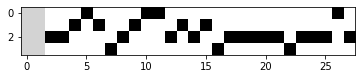

In [14]:
plt.imshow(x1.squeeze(), cmap='gray')

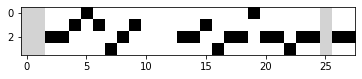

In [15]:
plt.imshow(x2.squeeze(), cmap='gray')

In [16]:
# Rendering
subplot_args = { 'nrows': 1, 'ncols': 2, 'figsize': (3, 3),
                 'subplot_kw': {'xticks': [], 'yticks': []} }

In [17]:
def loss(output):
    return (output[0][0])

In [18]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

In [19]:
!pip install tf_keras_vis

In [20]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.gradcam import Gradcam,GradcamPlusPlus
from tf_keras_vis.scorecam import ScoreCAM

In [21]:
for ind in range(len(model.layers)):
    print (ind, model.layers[ind])

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd627f648d0>
1 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd5ec29b4d0>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ec29b9d0>
3 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ec2c7610>
4 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd5ec2c7d50>
5 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd5ec300dd0>
6 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd627f64550>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd5ec297f10>
8 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd5ec223690>
9 <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fd5ec223bd0>
10 <tensorflow.python.keras.layers.core.Lambda object at 0x7fd5ec223f50>
11 <tensorflow.python.keras.layers.core.Lambda object

In [ ]:
#starts below

In [ ]:
saliency = Saliency(model,model_modifier=model_modifier,clone=True)
saliency_map = saliency(loss, [x1,x2])
saliency_map_1,saliency_map_2 = normalize(saliency_map[0]),normalize(saliency_map[1])

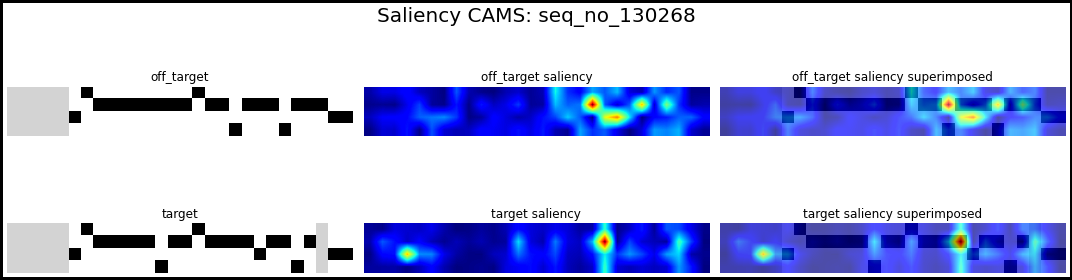

In [ ]:
fig  = plt.figure(figsize=(15,5),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
ax = fig.gca()
plt.subplots_adjust(hspace = .1, wspace = .1)
plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.title('off_target', color='k')
plt.subplot(2,3,4)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.title('target', color='k')
plt.subplot(2,3,2)
plt.axis('off')
plt.imshow(saliency_map_1.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('off_target saliency', color='k')
plt.subplot(2,3,5)
plt.axis('off')
plt.imshow(saliency_map_2.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('target saliency', color='k')
plt.subplot(2,3,3)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.imshow(saliency_map_1.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('off_target saliency superimposed', color='k')
plt.subplot(2,3,6)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.imshow(saliency_map_2.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('target saliency superimposed', color='k')
plt.tight_layout()
fig.suptitle('Saliency CAMS: seq_no_' + str(sample_id) , fontsize=20, color='k')
# plt.show()
plt.savefig('/content/drive/MyDrive/best models crispcnn/cams/saliency_epoch'+'best_model_seed10_epoch_'+str(epoch)+'_sample'+str(sample_id)+'.png', dpi=1200)

In [ ]:
#smoothed
smooth_saliency = Saliency(model,model_modifier=model_modifier,clone=True)
saliency_map = smooth_saliency(loss, [x1,x2], smooth_samples=30,smooth_noise=0.10)
saliency_map_1,saliency_map_2 = normalize(saliency_map[0]),normalize(saliency_map[1])

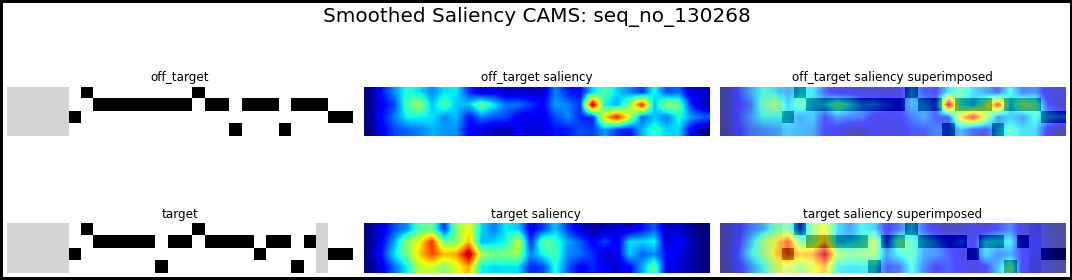

In [ ]:
fig  = plt.figure(figsize=(15,5),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
ax = fig.gca()
plt.subplots_adjust(hspace = .1, wspace = .1)
plt.subplot(2,3,1)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.title('off_target', color='k')
plt.subplot(2,3,4)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.title('target', color='k')
plt.subplot(2,3,2)
plt.axis('off')
plt.imshow(saliency_map_1.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('off_target saliency', color='k')
plt.subplot(2,3,5)
plt.axis('off')
plt.imshow(saliency_map_2.squeeze(), cmap='jet', interpolation='bilinear')
plt.title('target saliency', color='k')
plt.subplot(2,3,3)
plt.axis('off')
plt.imshow(x1.squeeze(), cmap='gray')
plt.imshow(saliency_map_1.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('off_target saliency superimposed', color='k')
plt.subplot(2,3,6)
plt.axis('off')
plt.imshow(x2.squeeze(), cmap='gray')
plt.imshow(saliency_map_2.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
plt.title('target saliency superimposed', color='k')
plt.tight_layout()
fig.suptitle('Smoothed Saliency CAMS: seq_no_' + str(sample_id) , fontsize=20, color='k')
# plt.show()
plt.savefig('/content/drive/MyDrive/best models crispcnn/cams/smoothsaliency_epoch'+str(epoch)+'_sample'+str(sample_id)+'.png', dpi=1200)